## Installing Dependancies

In [ ]:
!pip install opencv-python

In [ ]:
from google.colab.patches import cv2_imshow

# 68 points Face landmark

In [ ]:
!pip install dlib

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


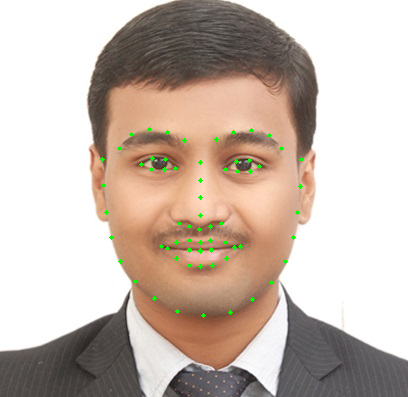

In [ ]:
import dlib
import cv2
import numpy as np

# Load the pre-trained face landmark predictor
predictor_path = "/content/drive/MyDrive/Colab Notebooks/Driver Drowsiness Dataset (DDD)/shape_predictor_68_face_landmarks.dat"
detector = dlib.get_frontal_face_detector()
predictor = dlib.shape_predictor(predictor_path)

def detect_landmarks(image_path):
    # Load the image
    image = cv2.imread(image_path)

    # Convert the image to grayscale
    gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

    # Detect faces in the image
    faces = detector(gray)

    # Loop over each face and detect landmarks
    for face in faces:
        landmarks = predictor(gray, face)

        # Convert the landmarks to a NumPy array
        landmarks_np = np.array([[p.x, p.y] for p in landmarks.parts()])

        # Draw the landmarks on the image
        for point in landmarks_np:
            cv2.circle(image, (point[0], point[1]), 2, (0, 255, 0), -1)

    # Display the image with landmarks
    cv2_imshow(image)
    cv2.waitKey(0)
    cv2.destroyAllWindows()

# Replace 'path/to/your/image.jpg' with the path to your input image
detect_landmarks('/content/drive/MyDrive/Colab Notebooks/Driver Drowsiness Dataset (DDD)/input_Ashish.jpg')


### Eyes Landmark Detection

In [ ]:
import dlib
import cv2
import numpy as np

# Load the pre-trained face landmark predictor
predictor_path = "/content/drive/MyDrive/Colab Notebooks/Driver Drowsiness Dataset (DDD)/shape_predictor_68_face_landmarks.dat"
detector = dlib.get_frontal_face_detector()
predictor = dlib.shape_predictor(predictor_path)

def detect_and_display_eyes(image_path):
    # Load the image
    image = cv2.imread(image_path)

    # Convert the image to grayscale
    gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

    # Detect faces in the image
    faces = detector(gray)

    # Loop over each face and detect landmarks
    for face in faces:
        landmarks = predictor(gray, face)

        # Extract landmarks for the left and right eyes
        left_eye_landmarks = landmarks.parts()[36:42]
        right_eye_landmarks = landmarks.parts()[42:48]

        # Convert the landmarks to NumPy arrays
        left_eye_np = np.array([[p.x, p.y] for p in left_eye_landmarks])
        right_eye_np = np.array([[p.x, p.y] for p in right_eye_landmarks])

        # Draw the landmarks on the image
        for point in left_eye_np:
            cv2.circle(image, (point[0], point[1]), 2, (0, 255, 0), -1)
        for point in right_eye_np:
            cv2.circle(image, (point[0], point[1]), 2, (0, 255, 0), -1)

        # Crop the image to show only the eyes region
        left_eye_region = image[min(left_eye_np[:, 1]):max(left_eye_np[:, 1]), min(left_eye_np[:, 0]):max(left_eye_np[:, 0])]
        right_eye_region = image[min(right_eye_np[:, 1]):max(right_eye_np[:, 1]), min(right_eye_np[:, 0]):max(right_eye_np[:, 0])]

        # Display the eyes regions
        cv2_imshow(left_eye_region)
        cv2_imshow(right_eye_region)
        cv2.waitKey(0)
        cv2.destroyAllWindows()

# Replace 'path/to/your/image.jpg' with the path to your input image
detect_and_display_eyes('/content/drive/MyDrive/Colab Notebooks/Driver Drowsiness Dataset (DDD)/input_Ashish.jpg')


## Calculation of EAR and MAR

### Eyes Aspect Ratio (EAR)

In [ ]:
import dlib
import cv2
import numpy as np

# Load the pre-trained face landmark predictor
predictor_path = "/content/drive/MyDrive/Colab Notebooks/Driver Drowsiness Dataset (DDD)/shape_predictor_68_face_landmarks.dat"
detector = dlib.get_frontal_face_detector()
predictor = dlib.shape_predictor(predictor_path)

def eye_aspect_ratio(eye_landmarks):
    # Calculate the Euclidean distances between the sets of vertical eye landmarks
    vertical_dist1 = np.linalg.norm(eye_landmarks[1] - eye_landmarks[5])
    vertical_dist2 = np.linalg.norm(eye_landmarks[2] - eye_landmarks[4])

    # Calculate the Euclidean distance between the set of horizontal eye landmarks
    horizontal_dist = np.linalg.norm(eye_landmarks[0] - eye_landmarks[3])

    # Calculate the eye aspect ratio
    ear = (vertical_dist1 + vertical_dist2) / (2.0 * horizontal_dist)
    return ear

def detect_and_display_eyes(image_path):
    # Load the image
    image = cv2.imread(image_path)

    # Convert the image to grayscale
    gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

    # Detect faces in the image
    faces = detector(gray)

    # Loop over each face and detect landmarks
    for face in faces:
        landmarks = predictor(gray, face)

        # Extract landmarks for the left and right eyes
        left_eye_landmarks = landmarks.parts()[36:42]
        right_eye_landmarks = landmarks.parts()[42:48]

        # Convert the landmarks to NumPy arrays
        left_eye_np = np.array([[p.x, p.y] for p in left_eye_landmarks])
        right_eye_np = np.array([[p.x, p.y] for p in right_eye_landmarks])

        # Draw the landmarks on the image
        for point in left_eye_np:
            cv2.circle(image, (point[0], point[1]), 2, (0, 255, 0), -1)
        for point in right_eye_np:
            cv2.circle(image, (point[0], point[1]), 2, (0, 255, 0), -1)

        # Calculate EAR for each eye
        left_ear = eye_aspect_ratio(left_eye_np)
        right_ear = eye_aspect_ratio(right_eye_np)

        print(f"Left Eye EAR: {left_ear:.2f}")
        print(f"Right Eye EAR: {right_ear:.2f}")

        # Crop the image to show only the eyes region
        left_eye_region = image[min(left_eye_np[:, 1]):max(left_eye_np[:, 1]), min(left_eye_np[:, 0]):max(left_eye_np[:, 0])]
        right_eye_region = image[min(right_eye_np[:, 1]):max(right_eye_np[:, 1]), min(right_eye_np[:, 0]):max(right_eye_np[:, 0])]

        # Display the eyes regions
        cv2_imshow(left_eye_region)
        cv2_imshow(right_eye_region)
        cv2.waitKey(0)
        cv2.destroyAllWindows()

# Replace 'path/to/your/image.jpg' with the path to your input image
detect_and_display_eyes('/content/drive/MyDrive/Colab Notebooks/Driver Drowsiness Dataset (DDD)/input_Ashish.jpg')


Left Eye EAR: 0.31
Right Eye EAR: 0.31


Left Eye EAR: 0.31
Right Eye EAR: 0.31


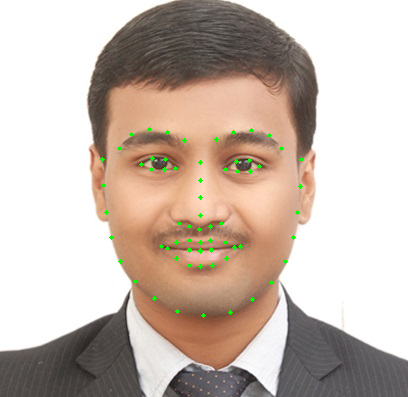

In [ ]:
import dlib
import cv2
import numpy as np

# Load the pre-trained face landmark predictor
predictor_path = "/content/drive/MyDrive/Colab Notebooks/Driver Drowsiness Dataset (DDD)/shape_predictor_68_face_landmarks.dat"
detector = dlib.get_frontal_face_detector()
predictor = dlib.shape_predictor(predictor_path)

def calculate_ear(marks):
    # Calculate the Euclidean distances between the vertical eye landmarks
    vertical_dist1 = np.linalg.norm(marks[1] - marks[5])
    vertical_dist2 = np.linalg.norm(marks[2] - marks[4])

    # Calculate the Euclidean distance between the horizontal eye landmarks
    horizontal_dist = np.linalg.norm(marks[0] - marks[3])

    # Calculate the eye aspect ratio
    ear = (vertical_dist1 + vertical_dist2) / (2.0 * horizontal_dist)
    return ear

def detect_eyes_ear(image_path):
    # Load the image
    image = cv2.imread(image_path)

    # Convert the image to grayscale
    gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

    # Detect faces in the image
    faces = detector(gray)

    # Loop over each face and detect landmarks
    for face in faces:
        landmarks = predictor(gray, face)

        # Convert the landmarks to a NumPy array
        landmarks_np = np.array([[p.x, p.y] for p in landmarks.parts()])

        # Draw the landmarks on the image
        for point in landmarks_np:
            cv2.circle(image, (point[0], point[1]), 2, (0, 255, 0), -1)

        # Calculate and print the EAR for each eye
        left_eye_ear = calculate_ear(landmarks_np[42:48])
        right_eye_ear = calculate_ear(landmarks_np[36:42])
        print(f"Left Eye EAR: {left_eye_ear:.2f}")
        print(f"Right Eye EAR: {right_eye_ear:.2f}")

    # Display the image with landmarks
    cv2_imshow(image)
    cv2.waitKey(0)
    cv2.destroyAllWindows()

# Replace 'path/to/your/image.jpg' with the path to your input image
detect_eyes_ear('/content/drive/MyDrive/Colab Notebooks/Driver Drowsiness Dataset (DDD)/input_Ashish.jpg')


### Mouth Aspect Ratio (MAR)

Mouth Aspect Ratio (MAR): 1.70


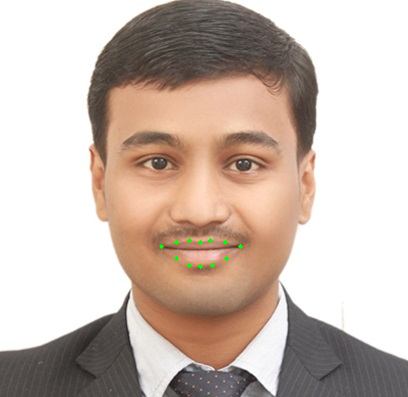

In [ ]:
import dlib
import cv2
import numpy as np

# Load the pre-trained face landmark predictor
predictor_path = "/content/drive/MyDrive/Colab Notebooks/Driver Drowsiness Dataset (DDD)/shape_predictor_68_face_landmarks.dat"
detector = dlib.get_frontal_face_detector()
predictor = dlib.shape_predictor(predictor_path)

def mouth_aspect_ratio(mouth_landmarks):
    # Calculate the Euclidean distances between the sets of mouth landmarks
    horizontal_dist1 = np.linalg.norm(mouth_landmarks[0] - mouth_landmarks[6])
    horizontal_dist2 = np.linalg.norm(mouth_landmarks[3] - mouth_landmarks[9])
    vertical_dist = np.linalg.norm(mouth_landmarks[2] - mouth_landmarks[10])

    # Calculate the mouth aspect ratio
    mar = (horizontal_dist1 + horizontal_dist2 + vertical_dist) / (3.0 * np.linalg.norm(mouth_landmarks[4] - mouth_landmarks[8]))
    return mar

def detect_and_display_mouth(image_path):
    # Load the image
    image = cv2.imread(image_path)

    # Convert the image to grayscale
    gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

    # Detect faces in the image
    faces = detector(gray)

    # Loop over each face and detect landmarks
    for face in faces:
        landmarks = predictor(gray, face)

        # Extract landmarks for the mouth
        mouth_landmarks = landmarks.parts()[48:60]

        # Convert the landmarks to NumPy arrays
        mouth_np = np.array([[p.x, p.y] for p in mouth_landmarks])

        # Draw the landmarks on the image
        for point in mouth_np:
            cv2.circle(image, (point[0], point[1]), 2, (0, 255, 0), -1)

        # Calculate MAR for the mouth
        mar = mouth_aspect_ratio(mouth_np)

        print(f"Mouth Aspect Ratio (MAR): {mar:.2f}")

        # Display the image with landmarks
        cv2_imshow(image)
        cv2.waitKey(0)
        cv2.destroyAllWindows()

# Replace 'path/to/your/image.jpg' with the path to your input image
detect_and_display_mouth('/content/drive/MyDrive/Colab Notebooks/Driver Drowsiness Dataset (DDD)/input_Ashish.jpg')


### Face Aspect Ratio (FAR)

Face Aspect Ratio (FAR): 0.92


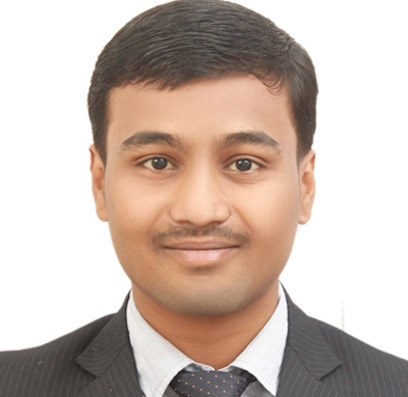

In [ ]:
import cv2
import dlib
import numpy as np

# Load the pre-trained face landmark predictor
predictor_path = "/content/drive/MyDrive/Colab Notebooks/Driver Drowsiness Dataset (DDD)/shape_predictor_68_face_landmarks.dat"
detector = dlib.get_frontal_face_detector()
predictor = dlib.shape_predictor(predictor_path)

def face_aspect_ratio(face_landmarks):
    # Extract landmarks for the eyes and mouth
    left_eye_landmarks = face_landmarks.parts()[17:22]
    right_eye_landmarks = face_landmarks.parts()[36:41]
    mouth_landmarks = face_landmarks.parts()[48:68]

    # Convert the landmarks to NumPy arrays
    left_eye_np = np.array([[p.x, p.y] for p in left_eye_landmarks])
    right_eye_np = np.array([[p.x, p.y] for p in right_eye_landmarks])
    mouth_np = np.array([[p.x, p.y] for p in mouth_landmarks])

    # Calculate the FAR using the distance between the eyes and mouth
    distance_eyes = np.linalg.norm(right_eye_np[0] - left_eye_np[0])
    distance_mouth = np.linalg.norm(mouth_np[4] - mouth_np[8])

    # Calculate the FAR
    far = distance_mouth / distance_eyes

    return far

def detect_and_display_face(image_path):
    # Load the image
    image = cv2.imread(image_path)

    # Convert the image to grayscale
    gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

    # Detect faces in the image
    faces = detector(gray)

    # Loop over each face and detect landmarks
    for face in faces:
        landmarks = predictor(gray, face)

        # Calculate FAR for the face
        far = face_aspect_ratio(landmarks)

        print(f"Face Aspect Ratio (FAR): {far:.2f}")

        # Display the image with landmarks
        cv2_imshow(image)
        cv2.waitKey(0)
        cv2.destroyAllWindows()

# Replace 'path/to/your/image.jpg' with the path to your input image
detect_and_display_face('/content/drive/MyDrive/Colab Notebooks/Driver Drowsiness Dataset (DDD)/input_Ashish.jpg')
